## Задание 4. Визуальный анализ данных
### Условие 1: Задача 1

#### 1.1. Скачать следующие данные: kc-house-data
#### 1.2. Изучите стоимости недвижимости
##### Постройте график
##### Назовите график
##### Сделайте именование оси x и оси y
##### Сделайте выводы
#### 1.3. Изучите распределение квадратуры жилой
#### 1.4. Изучите распределение года постройки

### Условие 2: 2 задача
#### 2.1. Изучите распределение домов от наличия вида на набережную
##### Постройте график
##### Сделайте выводы
#### 2.2. Изучите распределение этажей домов
#### 2.3. Изучите распределение состояния домов

### Условие 3: 3 задача
#### 3.1. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
#### 3.2. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 1.1. Скачать следующие данные: kc-house-data и laptop_price

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from matplotlib.ticker import FuncFormatter

Читаем данные:

In [2]:
house_data = pd.read_csv('kc-house-data_final.csv', sep = ',')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Узнаем количество объектов в файле csv:

In [3]:
len(house_data)

21613

 Всего 21613 цен на объекты недвижимости.

Изучаем типы данных:

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Лучше изменить тип date на datetime, чтобы было проще в дальнешем извлекать месяц или год покупки жилья:

In [5]:
def change_to_datetime(house_data):
    house_data['date'] = pd.to_datetime(house_data['date'])
    return house_data

Проверяем работу функии change_to_datetime():

In [6]:
change_to_datetime(house_data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Изучаем есть ли отсутствующие значения в массиве данных:

In [7]:
house_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Отсутвующих значений нет.

Проверяем есть ли дубликаты - одинаковые строки в таблице с одними и теме же данными:

In [8]:
duplicates = house_data[house_data.duplicated()]
print(len(duplicates))

0


Дубликатов нет.

In [9]:
duplicates = house_data[house_data.duplicated(subset=['id'])]
print(len(duplicates))

177


Некоторые дома были проданы несколько раз, один id.

Доступная нам информация по объектам недвижимости:
- __id__ - уникальный идентификатор для каждого проданного дома
- __date__ -  дата продажи дома
- __price__ - цена объекта недвижимости
- __bedrooms__ - количество спален
- __bathrooms__ — количество ванных комнат, где 0,5 соответствует комнате с туалетом, но без душа.
- __sqft_living__ - площадь внутренней жилой площади квартиры
- __sqft_lot__ - площадь земельного участка
- __floors__ - количество этажей
- __waterfront__ — переменная, определяющая, выходит ли объект на набережную или нет
- __view__ — индекс от 0 до 4, указывающий, насколько хороший вид у объекта недвижимости: 0 = нет вида, 1 = удовлетворительное, 2 = среднее, 3 = хорошее, 4 = отличное
- __condition__ - индекс от 1 до 5 по состоянию квартиры, 1 = Плохое - Изношенное, 2 = Удовлетворительное - Сильно изношенное, 3 = Среднее, 4 = Хорошее, 5 = Очень хорошее
- __grade__ - оценка качества объекта недвижимости, от 1 до 13, где 1-3 не соответствует строительному и проектному уровню, 7 - средний уровень строительства и проектирования, а 11-13 - высокий уровень качества строительства и проектирования.
- __sqft_above__ — площадь внутреннего жилого пространства над уровнем земли
- __sqft_basement__ — есть ли помещения ниже уровня земли (подвал)
- __yr_built__ — год постройки дома
- __yr_renovated__ - год последнего ремонта дома
- __zipcode__ - в какой области почтового индекса находится дом
- __lat__ - широта
- __long__ - долгота
- __sqft_living15__ - квадратные метры внутренней жилой площади жилья для ближайших 15 соседей
- __sqft_lot15__ - площадь земельных участков ближайших 15 соседей

Изучаем распределение и выявляем атипичные данные:

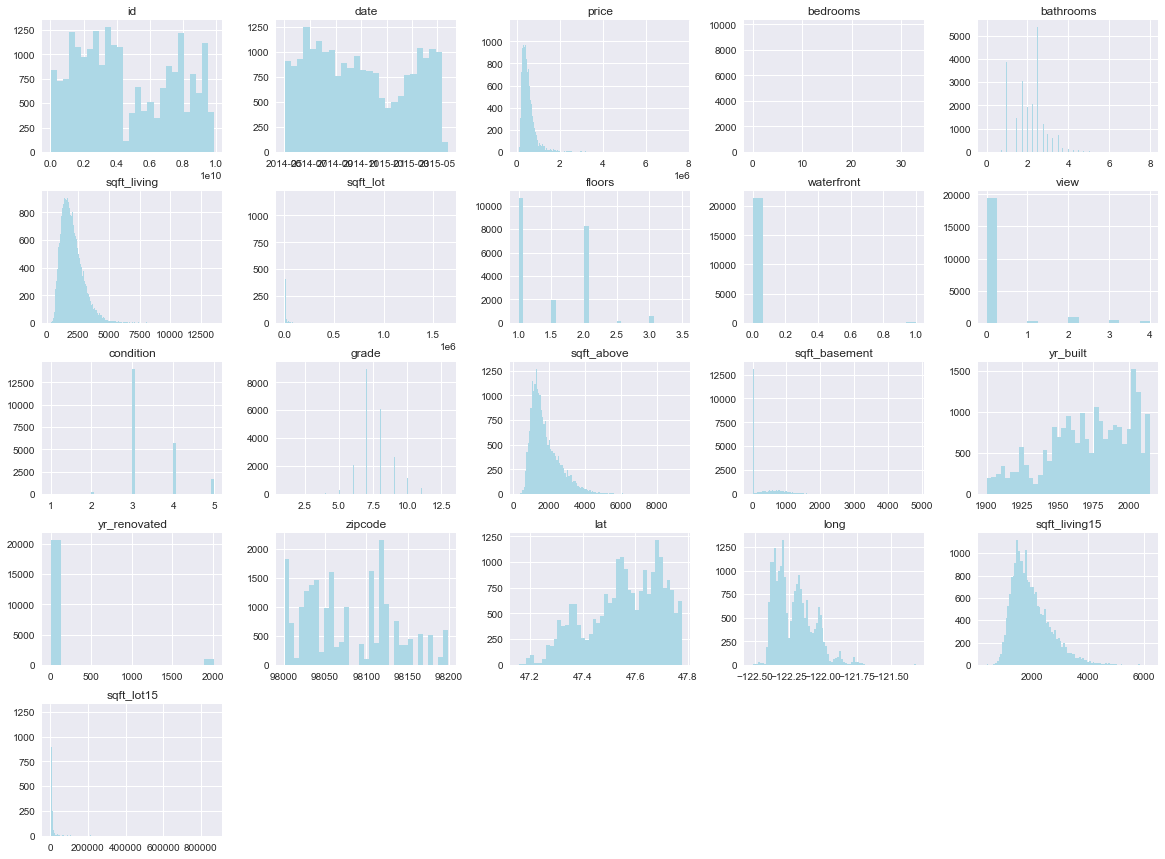

In [10]:
house_data.hist(figsize=(20, 15), bins = 'auto', color = 'LightBlue')
plt.show()

In [11]:
house_data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

bathrooms - float тип, есть смысл упростить до целых чисел:

In [12]:
def bathrooms_int(house_data):
    house_data['bathrooms'] = house_data['bathrooms'].map(lambda x: int(round(x,0)))
    return house_data

In [13]:
df = bathrooms_int(house_data)

Проверяем выполнение фукции:

In [14]:
house_data['bathrooms'].unique()

array([1, 2, 3, 4, 5, 0, 6, 7, 8])

На диаграмме bedrooms смущает количество ванных комнат - есть значения больше 30:

In [15]:
house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
house_data[(house_data['bedrooms'] == 33) | (house_data['bedrooms'] == 11) | (house_data['bedrooms'] == 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,2014-06-25,640000.0,33,2,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


Маловероятно, что объект площадью 1620 и ценой 640000 будет иметь 33 ванные комнаты. Изменяем на более вероятное количество ванных комнат в подобном объекте:

In [17]:
house_data.loc[15870, 'bedrooms'] = 3

### 1.2. Изучите стоимости недвижимости

В наборе данных price - целевая переменная.  Для понимания какие показатели больше всего влияют на целевую переменную выполним проверку корреляций.
Для этого построим тепловую карту для визуализации корреляционной матрицы.

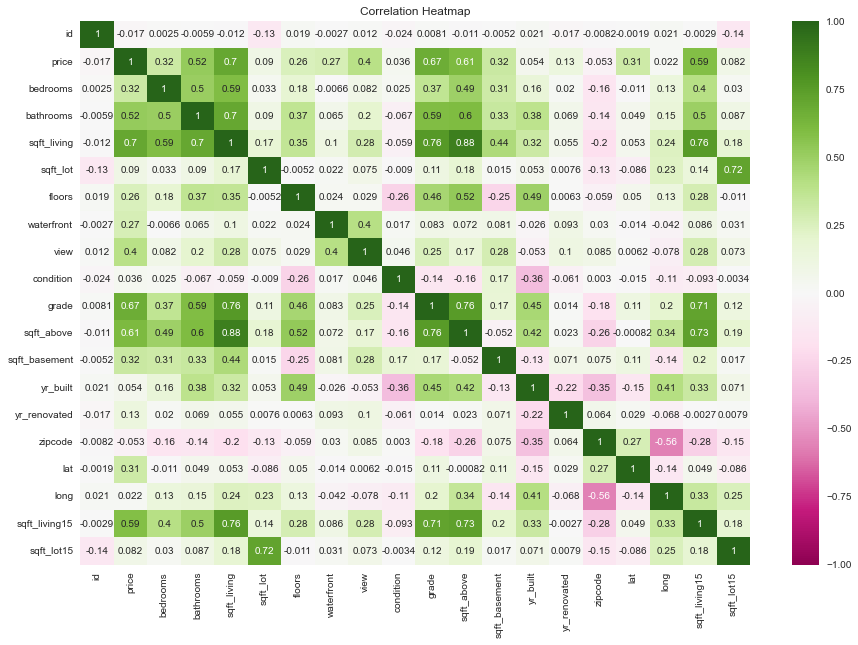

In [18]:
corr = house_data.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'PiYG', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Цена коррелирует главным образом c sqft_living и остальными параметрами, связанными с площадью объекта недвижимости (sqft_living15,sqft_lot15,sqft_lot), а также с оценкой качества жилья (чем выше grade, тем больше стоимость жилья).
Выявлена некоторая взаимосвязь между количеством ванных комнат и долготой из чего можно предположить, что:
- чем больше ванных комнат, тем дороже объект недвижимость 
- расположение объекта на местности (район) влияет на стоимость

Нам стоит создать диаграмму распределения плотности цен на объекты недвижимости, чтобы понять с каким распределением мы имеем дело.

In [19]:
house_data['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

In [20]:
avr_p = house_data['price'].mean()
median_p = house_data['price'].median()
mode_p = house_data['price'].mode()
std_p = house_data['price'].std()
per75_p = np.percentile(house_data['price'],75)
per25_p = np.percentile(house_data['price'],25)
per0_p = np.percentile(house_data['price'],0)
per100_p = np.percentile(house_data['price'],100)

In [21]:
print("Average: %f" % avr_p)
print("Median: %f" % median_p)

Average: 540088.141767
Median: 450000.000000


In [22]:
print(mode_p)

0    350000.0
1    450000.0
Name: price, dtype: float64


In [23]:
house_data['price'].median() - house_data['price'].mean()

-90088.14176652941

Среднее арифметическое больше медианы.

In [24]:
avr_p+std_p

907215.3382492291

In [25]:
avr_p-std_p

172960.9452838297

Изучаем распределение по стоимости цены объектов с помощью диаграммы:

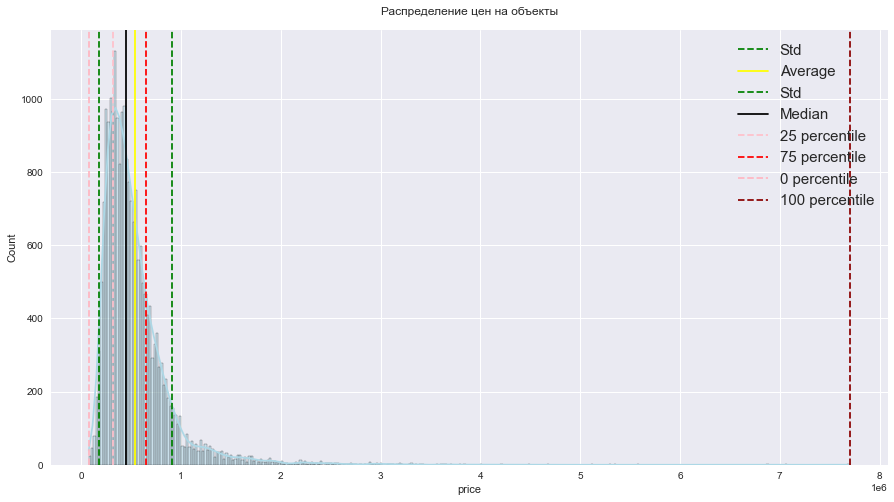

In [26]:
plt.figure(figsize = (15,8))
sns.histplot(house_data.price, bins='auto', color = 'lightblue', kde=True)
plt.title('Распределение цен на объекты', pad = 15)
plt.axvline(x = 907215.3382492291, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'green', label = 'Std')
plt.axvline(x = avr_p, ymin = 0, ymax = house_data['price'].max(), color = 'Yellow', label = 'Average')
plt.axvline(x = 172960.9452838297, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'green', label = 'Std')
plt.axvline(x = median_p, ymin = 0, ymax = house_data['price'].max(), color = 'black', label = 'Median')
plt.axvline(x = per25_p, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'pink', label = '25 percentile')
plt.axvline(x = per75_p, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'red', label = '75 percentile')
plt.legend(fontsize=15);
plt.axvline(x = per0_p, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'lightpink', label = '0 percentile')
plt.axvline(x = per100_p, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'darkred', label = '100 percentile')
plt.legend(fontsize=15, loc='upper right');

In [27]:
print("Положительная ассиметрия: %f" % house_data['price'].skew())
print("Эксцесс: %f" % house_data['price'].kurt())

Положительная ассиметрия: 4.024069
Эксцесс: 34.585540


Данные имеют положительную асимметрию.  Виден длинный хвост и перекос вправо, вызванные наличием необычайно высоких значений. Эти слишком большие величины смещают среднее значение вправо, и оно становится больше медианы.
Высокий эксцесс представляет собой тяжелые хвосты, что означает большее количество выбросов.

In [28]:
for i in range (70,100):
    q = i/100
    quantile = house_data['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.7 percentile: 595000.0
0.71 percentile: 600000.0
0.72 percentile: 612000.0
0.73 percentile: 623000.0
0.74 percentile: 632440.0
0.75 percentile: 645000.0
0.76 percentile: 652500.0
0.77 percentile: 665000.0
0.78 percentile: 677500.0
0.79 percentile: 690000.0
0.8 percentile: 700108.0
0.81 percentile: 718000.0
0.82 percentile: 730000.0
0.83 percentile: 749950.0
0.84 percentile: 760000.4
0.85 percentile: 779494.0
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836780.0
0.89 percentile: 859977.2
0.9 percentile: 887000.0
0.91 percentile: 919999.2
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1063560.0
0.95 percentile: 1156480.0
0.96 percentile: 1259040.0
0.97 percentile: 1388000.0
0.98 percentile: 1600000.0
0.99 percentile: 1964400.0


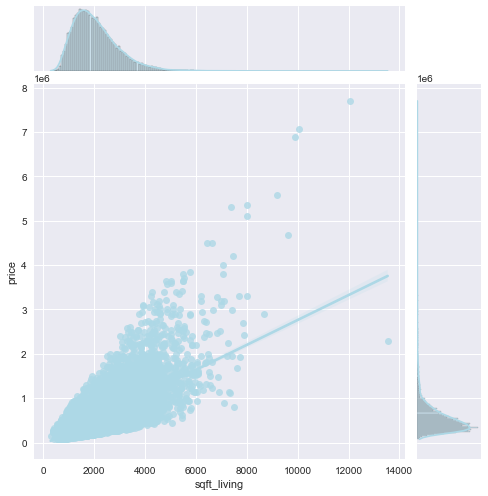

In [29]:
sns.jointplot(x="sqft_living", y="price", data=house_data, kind = 'reg', height = 7, color = 'lightblue')
plt.show()

Наличие дорогостоящего жилья искажает данные. Удалим дома стоимостью выше $1,1 млн. Их можно изучать отдельно в рамках более широкого проекта. Более того, мы можем предполагать, что покупательское поведение владельцев дорогих объектов недвижимости отличается, т.е. их критерии выбора объекта недвижимости могут быть другими, что будет усложнять в дальнейшем прогноз и аналитику для среднего и ниже средного по цене сегментов рынка.

In [30]:
house_data = house_data[house_data['price']<2156480]

In [31]:
for i in range (70,100):
    q = i/100
    quantile = house_data['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.7 percentile: 589000.0
0.71 percentile: 599000.0
0.72 percentile: 605000.0
0.73 percentile: 616000.0
0.74 percentile: 625000.0
0.75 percentile: 637000.0
0.76 percentile: 650000.0
0.77 percentile: 657500.0
0.78 percentile: 670000.0
0.79 percentile: 680000.0
0.8 percentile: 696000.0
0.81 percentile: 709017.5
0.82 percentile: 722710.0
0.83 percentile: 736500.0
0.84 percentile: 750000.0
0.85 percentile: 766837.5
0.86 percentile: 782000.0
0.87 percentile: 800000.0
0.88 percentile: 822400.0
0.89 percentile: 843575.0
0.9 percentile: 865000.0
0.91 percentile: 895000.0
0.92 percentile: 925000.0
0.93 percentile: 962910.0
0.94 percentile: 1000975.0
0.95 percentile: 1081875.0
0.96 percentile: 1185000.0
0.97 percentile: 1285000.0
0.98 percentile: 1416200.0
0.99 percentile: 1650000.0


In [32]:
avr = house_data['price'].mean()
median = house_data['price'].median()
mode = house_data['price'].mode()
std = house_data['price'].std()
per75 = np.percentile(house_data['price'],75)
per25 = np.percentile(house_data['price'],25)
per0 = np.percentile(house_data['price'],0)
per100 = np.percentile(house_data['price'],100)

In [33]:
house_data['price'].describe().round(2)

count      21436.00
mean      520968.67
std       291893.57
min        75000.00
25%       320000.00
50%       450000.00
75%       637000.00
max      2152500.00
Name: price, dtype: float64

In [34]:
avr+std

812862.2353218924

In [35]:
avr-std

229075.09701623028

In [36]:
house_data['price'].max()

2152500.0

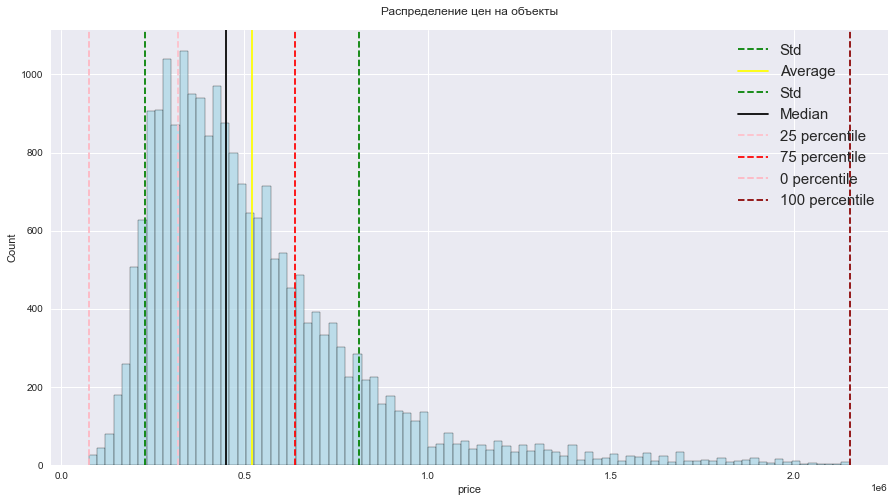

In [37]:
plt.figure(figsize = (15,8))
sns.histplot(house_data.price, bins='auto', color = 'lightblue')
plt.title('Распределение цен на объекты', pad = 15)
plt.axvline(x = 812862.2353218924, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'green', label = 'Std')
plt.axvline(x = avr, ymin = 0, ymax = house_data['price'].max(), color = 'Yellow', label = 'Average')
plt.axvline(x = 229075.09701623028, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'green', label = 'Std')
plt.axvline(x = median, ymin = 0, ymax = house_data['price'].max(), color = 'black', label = 'Median')
plt.axvline(x = per25, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'pink', label = '25 percentile')
plt.axvline(x = per75, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'red', label = '75 percentile')
plt.legend(fontsize=15);
plt.axvline(x = per0, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'lightpink', label = '0 percentile')
plt.axvline(x = per100, ymin = 0, ymax = house_data['price'].max(), linestyle = '--', color = 'darkred', label = '100 percentile')
plt.legend(fontsize=15, loc='upper right');

In [38]:
print("Положительная ассиметрия: %f" % house_data['price'].skew())
print("Эксцесс: %f" % house_data['price'].kurt())

Положительная ассиметрия: 1.840977
Эксцесс: 4.710395


В дальнейшем для построения модели может понадобиться логаримфическое преобразование.

### 1.3. Изучите распределение квадратуры жилой

In [39]:
avr_sq = house_data['sqft_living'].mean()
median_sq = house_data['sqft_living'].median()
mode_sq = house_data['sqft_living'].mode()
std_sq = house_data['sqft_living'].std()
per75_sq = np.percentile(house_data['sqft_living'],75)
per25_sq = np.percentile(house_data['sqft_living'],25)
per0_sq = np.percentile(house_data['sqft_living'],0)
per100_sq = np.percentile(house_data['sqft_living'],100)

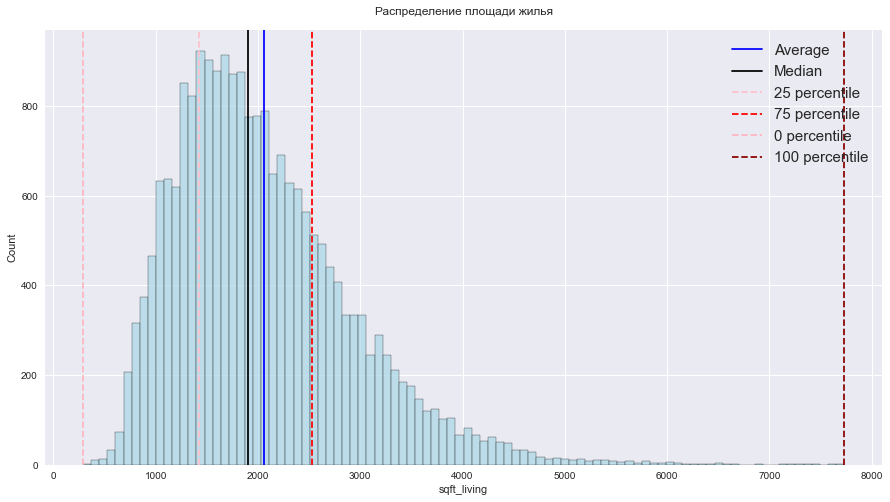

In [40]:
plt.figure(figsize = (15,8))
sns.histplot(house_data.sqft_living, bins='auto', color = 'lightblue')
plt.title('Распределение площади жилья', pad = 15)
plt.axvline(x = avr_sq, ymin = 0, ymax = house_data['sqft_living'].max(), color = 'blue', label = 'Average')
plt.axvline(x = median_sq, ymin = 0, ymax = house_data['sqft_living'].max(), color = 'black', label = 'Median')
plt.axvline(x = per25_sq, ymin = 0, ymax = house_data['sqft_living'].max(), linestyle = '--', color = 'pink', label = '25 percentile')
plt.axvline(x = per75_sq, ymin = 0, ymax = house_data['sqft_living'].max(), linestyle = '--', color = 'red', label = '75 percentile')
plt.legend(fontsize=15)
plt.axvline(x = per0_sq, ymin = 0, ymax = house_data['sqft_living'].max(), linestyle = '--', color = 'lightpink', label = '0 percentile')
plt.axvline(x = per100_sq, ymin = 0, ymax = house_data['sqft_living'].max(), linestyle = '--', color = 'darkred', label = '100 percentile')
plt.legend(fontsize=15, loc='upper right');

In [41]:
house_data['sqft_living'].min(), house_data['sqft_living'].max()

(290, 7730)

In [42]:
house_data['sqft_living'].mode()

0    1300
Name: sqft_living, dtype: int64

In [43]:
house_data['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1010    129
1800    129
       ... 
2783      1
6510      1
1463      1
1778      1
1425      1
Name: sqft_living, Length: 988, dtype: int64

In [44]:
house_data['sqft_living'].median()

1900.0

In [45]:
house_data['sqft_living'].mean()

2054.543151707408

Минамальная площадь обекта недвижимости - 290 квадратных футов, максимальная площадь - 7730 квадратных футов. 
Наиболее часто встречащая площадь среди всех объектов недвижимости - около 1300 квадратных футов. 


Между размером жилой площади (sqft_living) и ценой существует зависимость. Увеличение жилой площади обычно соответствует увеличению стоимости объекта недвижимости.

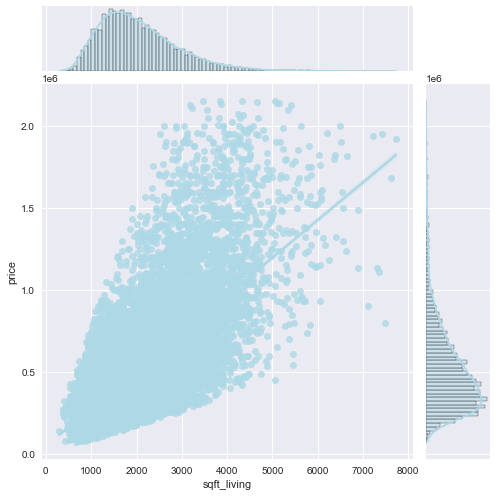

In [47]:
sns.jointplot(x="sqft_living", y="price", data=house_data, kind = 'reg', height = 7, color = 'lightblue')
plt.show()

### 1.4. Изучите распределение года постройки

In [48]:
avr_y = house_data['yr_built'].mean()
median_y = house_data['yr_built'].median()
mode_y = house_data['yr_built'].mode()
std_y = house_data['yr_built'].std()
per75_y = np.percentile(house_data['yr_built'],75)
per25_y = np.percentile(house_data['yr_built'],25)
per0_y = np.percentile(house_data['yr_built'],0)
per100_y = np.percentile(house_data['yr_built'],100)

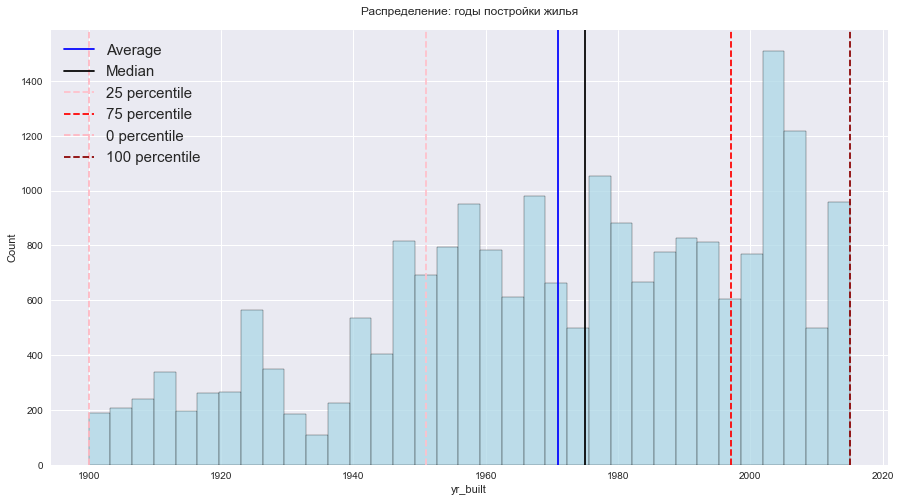

In [49]:
plt.figure(figsize = (15,8))
sns.histplot(house_data.yr_built, bins='auto', color = 'lightblue')
plt.title('Распределение: годы постройки жилья', pad = 15)
plt.axvline(x = avr_y, ymin = 0, ymax = house_data['yr_built'].max(), color = 'blue', label = 'Average')
plt.axvline(x = median_y, ymin = 0, ymax = house_data['yr_built'].max(), color = 'black', label = 'Median')
plt.axvline(x = per25_y, ymin = 0, ymax = house_data['yr_built'].max(), linestyle = '--', color = 'pink', label = '25 percentile')
plt.axvline(x = per75_y, ymin = 0, ymax = house_data['yr_built'].max(), linestyle = '--', color = 'red', label = '75 percentile')
plt.legend(fontsize=15);
plt.axvline(x = per0_y, ymin = 0, ymax = house_data['yr_built'].max(), linestyle = '--', color = 'lightpink', label = '0 percentile')
plt.axvline(x = per100_y, ymin = 0, ymax = house_data['yr_built'].max(), linestyle = '--', color = 'darkred', label = '100 percentile')
plt.legend(fontsize=15);

In [50]:
house_data['yr_built'].describe().round(2)

count    21436.00
mean      1970.99
std         29.32
min       1900.00
25%       1951.00
50%       1975.00
75%       1997.00
max       2015.00
Name: yr_built, dtype: float64

In [51]:
house_data['yr_built'].mode()

0    2014
Name: yr_built, dtype: int64

In [52]:
house_data['yr_built'].value_counts()

2014    553
2006    446
2005    446
2004    428
2003    418
       ... 
1901     29
1933     28
1902     27
1935     23
1934     21
Name: yr_built, Length: 116, dtype: int64

Строителство обектов недвижимости происходило неравномерно по времени. Первый обект недвижимости был построен в 1990 году. За последние 45 лет была посторена половина от всех обектов недвижимости. Наибольшее количество объектов было построено в 2014 году - 553.

### Условие 2: 2 задача
#### 2.1. Изучите распределение домов от наличия вида на набережную

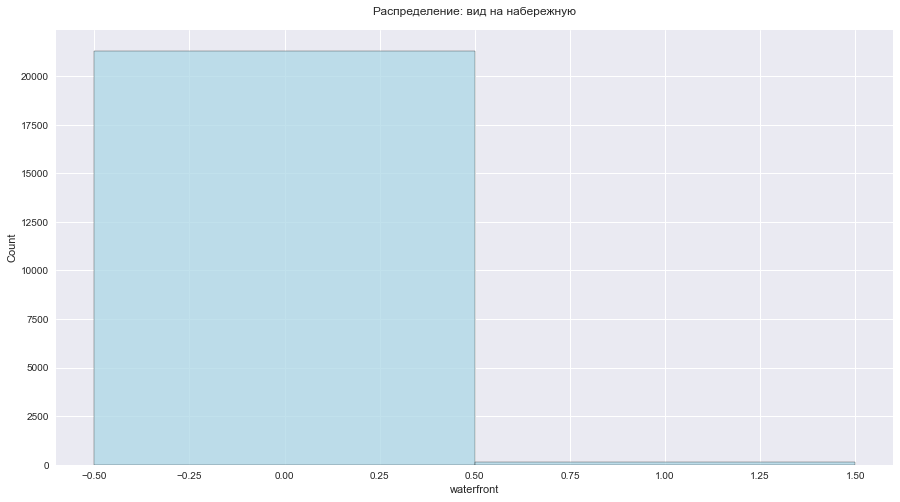

In [53]:
plt.figure(figsize = (15,8))
sns.histplot(house_data.waterfront, bins='auto', color = 'lightblue', discrete=(True, False))
plt.title('Распределение: вид на набережную', pad = 15);

Бинарные значения 1/0.

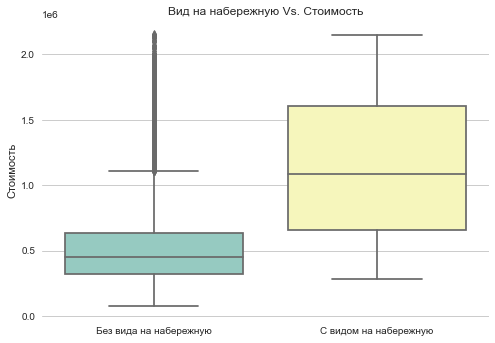

In [54]:
sns.set_style("whitegrid")
sns.boxplot(x="waterfront", y="price", data=house_data, palette="Set3")
plt.title("Вид на набережную Vs. Стоимость")
plt.ylabel("Стоимость")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Без вида на набережную', 'С видом на набережную'))
plt.show()

Объекты недвижимости с видом на набережную стоят дороже, чем объекты без вида на набережную.
Разница в стоиомсти у объектов без вида на набережную меньше, чем у обектов с видом на набережную - там больший разброс цен.

In [55]:
waterfrontmean = house_data[house_data['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = house_data[house_data['waterfront'] == 0]['price'].mean()
print(f"Средня цена на объект с видом на набережную - USD {round(waterfrontmean,2)}")
print(f"Средня цена на объект без вида на набережную - USD {round(nonwaterfrontmean,2)}")

Средня цена на объект с видом на набережную - USD 1125371.6
Средня цена на объект без вида на набережную - USD 517566.14


In [56]:
x = len(house_data[house_data['waterfront'] == 0])
y = len(house_data[house_data['waterfront'] == 1])

In [57]:
print(f'Количество объектов с видом на набережную - ', y)
print(f'Количество объектов без вида на набережную - ', x)

Количество объектов с видом на набережную -  120
Количество объектов без вида на набережную -  21316


#### 2.2. Изучите распределение этажей домов¶

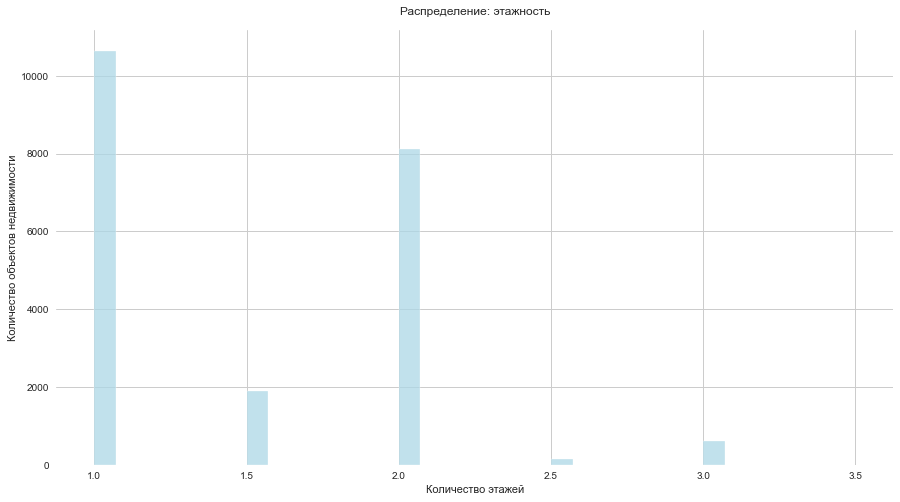

In [58]:
plt.figure(figsize = (15,8))
sns.histplot(house_data.floors, bins='auto', color = 'lightblue')
plt.ylabel("Количество объектов недвижимости")
plt.xlabel("Количество этажей")
plt.title('Распределение: этажность', pad = 15);

In [59]:
house_data['floors'].value_counts()

1.0    10649
2.0     8124
1.5     1901
3.0      610
2.5      145
3.5        7
Name: floors, dtype: int64

Больше всего объектов недвижимости с одним этажем или двумя этажами.

#### 2.3. Изучите распределение состояния домов

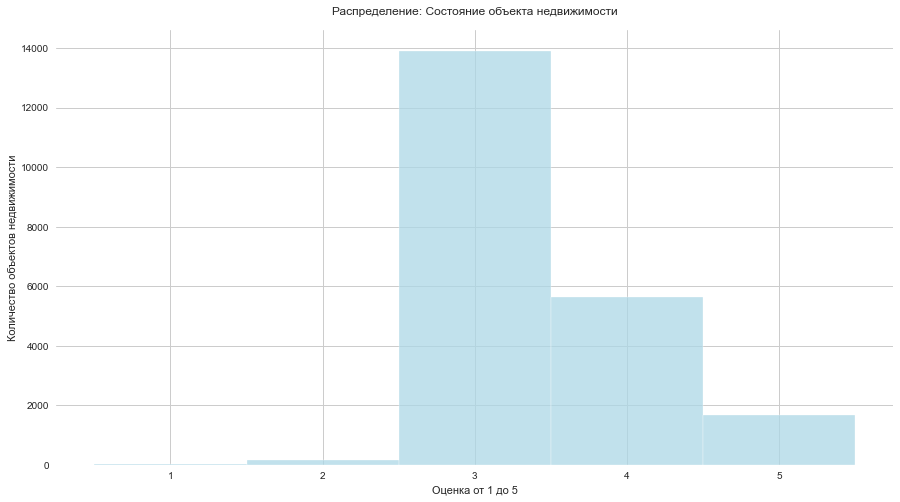

In [61]:
plt.figure(figsize = (15,8))
sns.histplot(house_data.condition, color = 'lightblue', discrete=True)
plt.ylabel("Количество объектов недвижимости")
plt.xlabel("Оценка от 1 до 5")
plt.title('Распределение: Состояние объекта недвижимости', pad = 15);

In [62]:
house_data['condition'].value_counts()

3    13918
4     5641
5     1676
2      171
1       30
Name: condition, dtype: int64

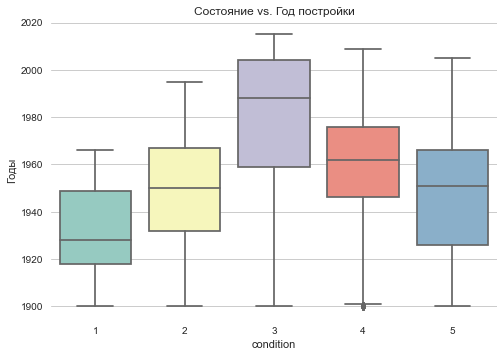

In [64]:
condition_vs = ['condition']

for feature in condition_vs:
    sns.boxplot(x = house_data[feature], y = house_data['yr_built'], palette="Set3")
    plt.title(f"Состояние vs. Год постройки")
    plt.ylabel("Годы")
    plt.xlabel(f"{feature}")
    plt.show()

Большинство обектов имеют оценку 3 - 13918. 
Есть некоторая взаимосвязь между состоянием обекта недвижимости и годом постройки, а также ценой объекта.
- чем позже построен обект, тем больше вероятность, что его состояние будет удовлетвортельное

Объекты недвижимости построеные в 1920 - 1940 годах могут быть в плохом (1 или 2), так и в отличном состоянии (5).

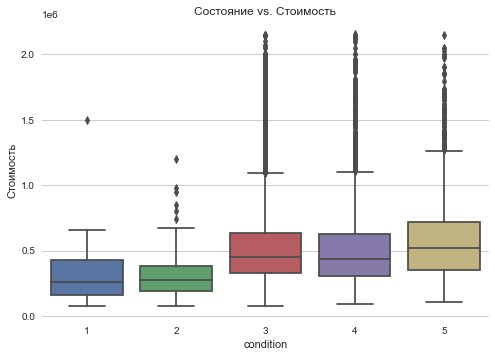

In [65]:
condition_vs = ['condition']

for feature in condition_vs:
    sns.boxplot(x = house_data[feature], y = house_data['price'])
    plt.title(f"Состояние vs. Стоимость")
    plt.ylabel("Стоимость")
    plt.xlabel(f"{feature}")
    plt.show()

### Условие 3: 3 задача
#### 3.1. Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
#### 3.2. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


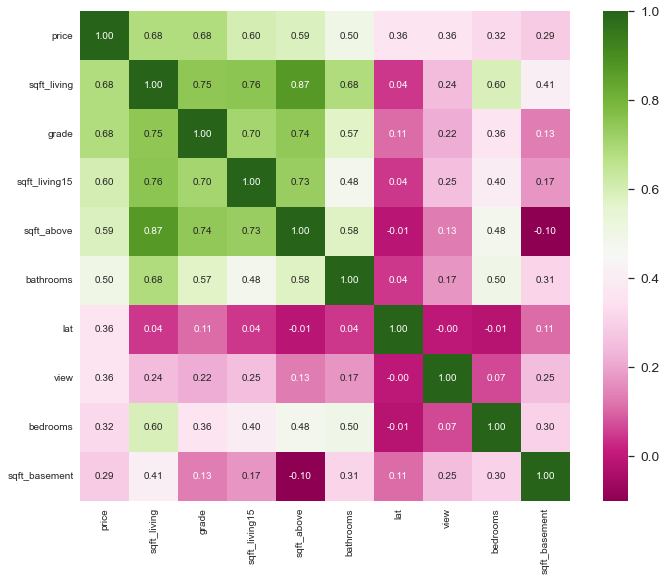

In [66]:
corrmat = house_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 # количество коррелирующих признаков, которое мы хотим увидеть
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(house_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap = 'PiYG')
plt.show()

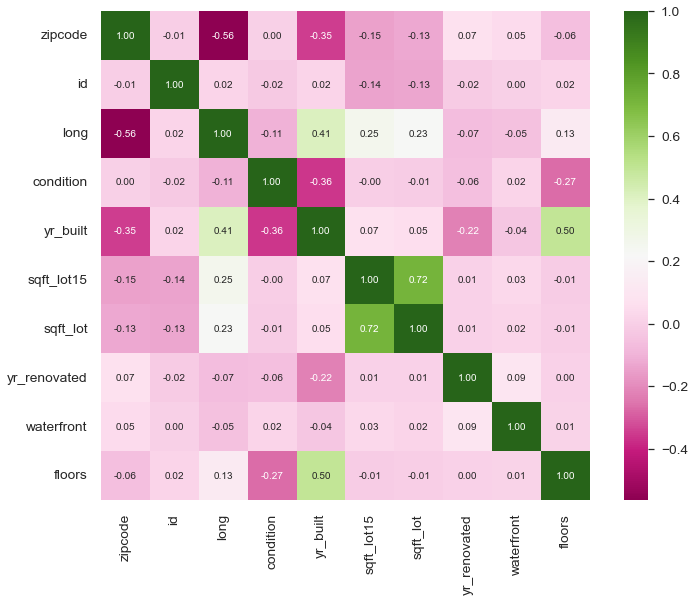

In [67]:
corrmat = house_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 # количество коррелирующих признаков, которое мы хотим увидеть
cols = corrmat.nsmallest(k, 'price')['price'].index
cm = np.corrcoef(house_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap = 'PiYG')
plt.show()

Стоимость объекта недвижимости главным образом зависит от:
- оценки качества объекта недвижимости (чем > grade, тем > стоимость)
- площади обекста недвижимости (чем > grade, тем > стоимость)

Также на стоимость может влиять:
- расположение (long - lat)
- год постройки дома (yr_built)
- площадь жилья ближайших соседей (sqft_living15)
- площадь внутреннего жилого пространства над уровнем земли (sqft_above)

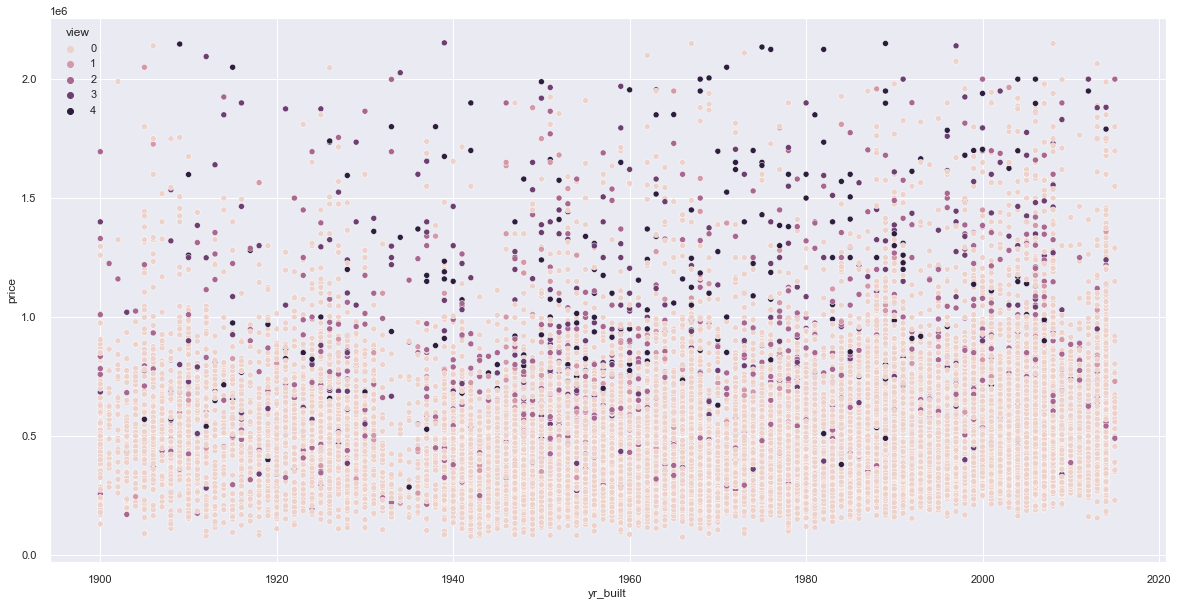

In [69]:
sns.set(rc ={"figure.figsize":(20,10)})
sns.scatterplot(data = house_data,x = 'yr_built' , y = 'price', hue = "view");

Объекты недвижимости с хорошим видом чаще имеют большую стоимость.

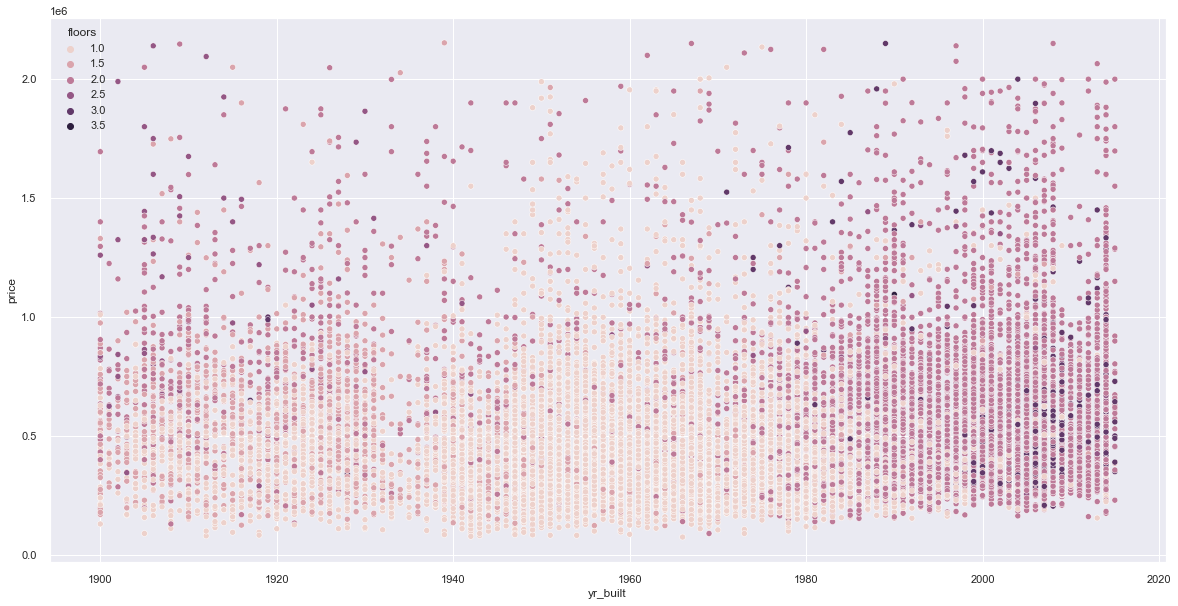

In [71]:
sns.set(rc ={"figure.figsize":(20,10)})
sns.scatterplot(data = house_data,x = 'yr_built' , y = 'price', hue = "floors");

С 2000 года стали чаще строить многоэтажные дома - в 2 или 3 этажа.

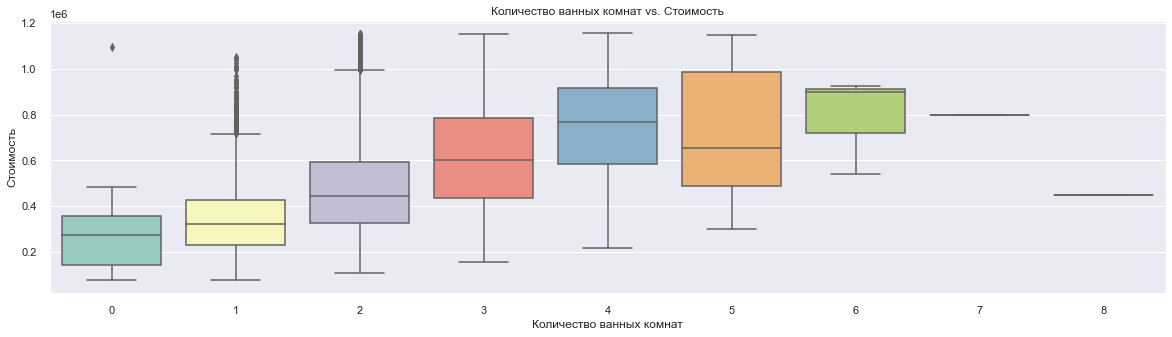

In [155]:
sns.set_style("whitegrid")
sns.set(rc ={"figure.figsize":(20,5)})
sns.boxplot(x="bathrooms", y="price", data=house_data, palette="Set3")
plt.title("Количество ванных комнат vs. Стоимость")
plt.ylabel("Стоимость")
plt.xlabel("Количество ванных комнат");

Чем больше ванных комнат, тем выше стоимость.

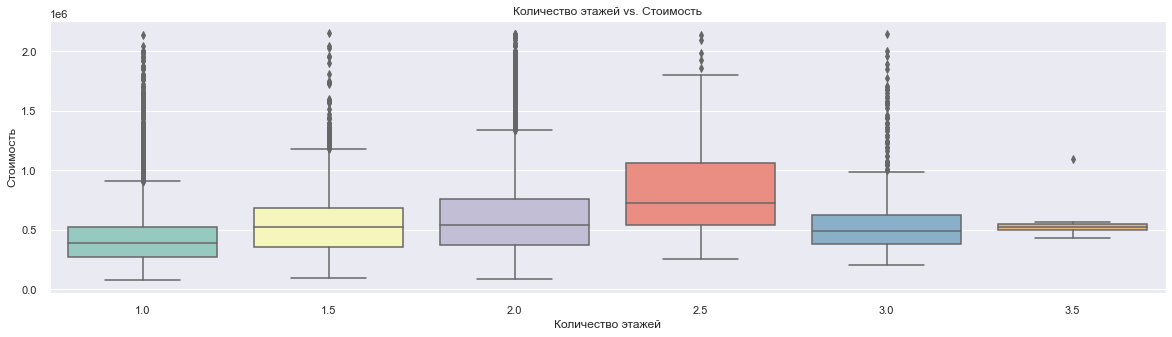

In [74]:
sns.set_style("whitegrid")
sns.set(rc ={"figure.figsize":(20,5)})
sns.boxplot(x="floors", y="price", data=house_data, palette="Set3")
plt.title("Количество этажей vs. Стоимость")
plt.ylabel("Стоимость")
plt.xlabel("Количество этажей");

Дома с 3,5 этажами не являются самыми дорогими или нужно проверить данные на вбросы.

Среди дорогих домов могут быть обекты разной этажности.

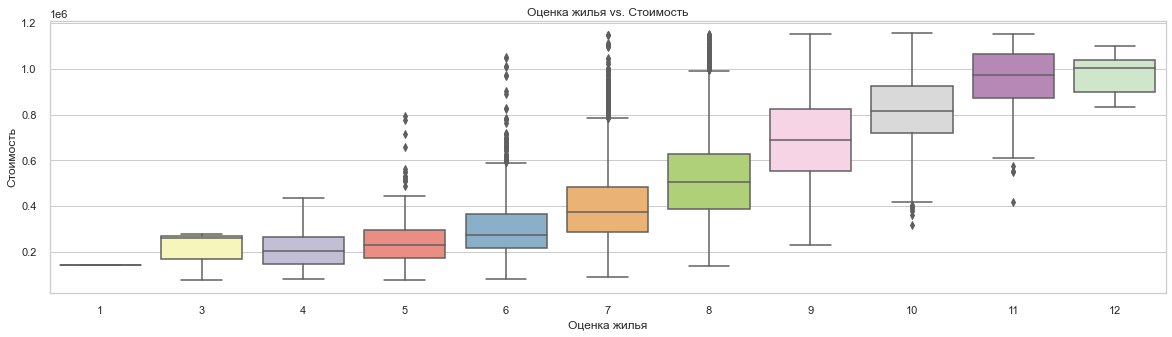

In [161]:
sns.set_style("whitegrid")
sns.boxplot(x="grade", y="price", data=house_data, palette="Set3")
plt.title("Оценка жилья vs. Стоимость")
plt.ylabel("Стоимость")
plt.xlabel("Оценка жилья");

Дорогие объекты недвижимости имеют выше оценку.
Обексты стоимостью больше 600 тыс. редко оцениваются выше 8.

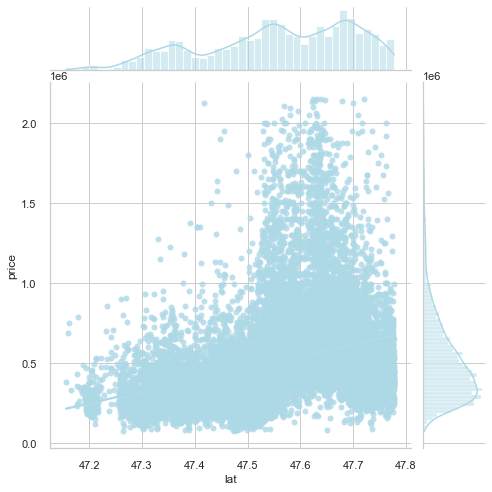

In [79]:
sns.jointplot(x="lat", y="price", data=house_data, kind = 'reg', height = 7, color = 'lightblue')
plt.show()

Есть взаимосвязь между стоимостью и расположением объекта на местности, если говорить про широту. 

- Это может быть связано с разными факторами: рельефом местности или ее спецификой (море, горы).
- историческими районами с недорогой, средней по цене и дорогими районами (например, центр) и остальным.


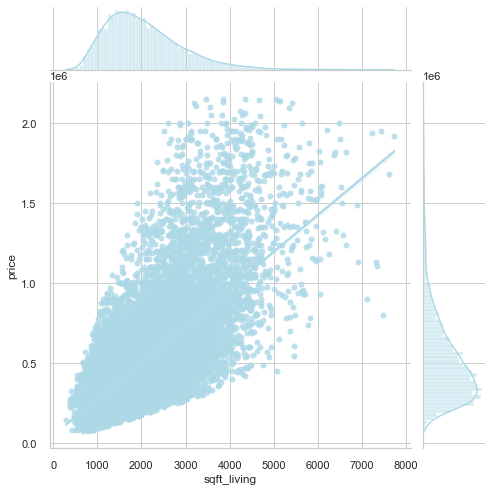

In [81]:
sns.jointplot(x="sqft_living", y="price", data=house_data, kind = 'reg', height = 7, color = 'lightblue')
plt.show()

 Чем больше площадь, тем больше стоиомсть. Есть вбросы или другие факторы влиящие на стоимость.

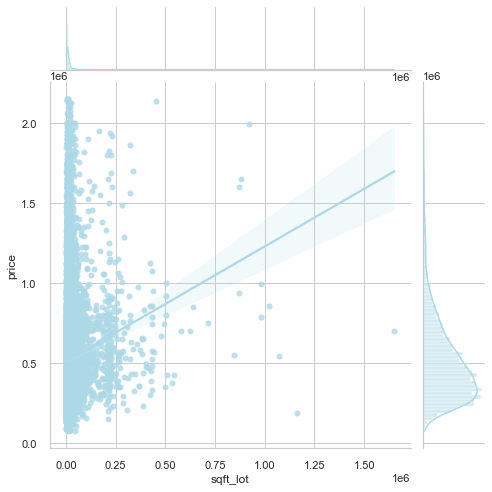

In [83]:
sns.jointplot(x="sqft_lot", y="price", data=house_data, kind = 'reg', height = 7, color = 'lightblue')
plt.show()

Скорее всего есть некорректные данные в sqft_lot. Нужно перепроверять.